In [ ]:
import tensorflow as tf
tf.keras.backend.clear_session()

In [ ]:
# TensorFlow and tf.keras
import tensorflow as tf
import os

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator

from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, Activation, Flatten, MaxPool2D
from keras.optimizers import Adam, RMSprop


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
import os
os.environ['TF_GPU_ALLOCATOR'] = 'cuda_malloc_async'

Num GPUs Available:  1


In [ ]:
# Split train test
!pip install split-folders
import splitfolders
splitfolders.ratio("/content/drive/MyDrive/image_data", output="datahasil", seed=1337, ratio=(.8, .2), group_prefix=None)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Copying files: 0 files [00:00, ? files/s]


In [ ]:
training_dir = os.path.join('/content/drive/MyDrive/image_data', 'train')
testing_dir = os.path.join('/content/drive/MyDrive/image_data', 'test')

In [ ]:
training_datagen = ImageDataGenerator(
      rescale = 1./255,
	    rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(
	training_dir,
	target_size=(32,32),
	class_mode='categorical',
  batch_size=32
)

validation_generator = validation_datagen.flow_from_directory(
	testing_dir,
	target_size=(32,32),
	class_mode='categorical',
  batch_size=32
)

Found 2020 images belonging to 2 classes.
Found 420 images belonging to 2 classes.


In [ ]:
class_indices = train_generator.class_indices
print(class_indices)
class_names = list(class_indices.keys())
print(class_names)

{'fake': 0, 'real': 1}
['fake', 'real']


In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('val_accuracy')>0.96):
      print("\nReached 96% accuracy so cancelling training!")
      self.model.stop_training = True

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 flatten (Flatten)           (None, 2048)              0

In [ ]:
model.compile(loss = 'categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [ ]:
history = model.fit(train_generator,
                    epochs=200,
                    validation_data = validation_generator,
                    verbose = 1,
                    callbacks=[myCallback()],
                    validation_steps=3)

Epoch 1/200
64/64 [==============================] - 291s 4s/step - loss: 0.6967 - accuracy: 0.5297 - val_loss: 0.6857 - val_accuracy: 0.5104
Epoch 2/200
64/64 [==============================] - 26s 408ms/step - loss: 0.6569 - accuracy: 0.6168 - val_loss: 0.5778 - val_accuracy: 0.7500
Epoch 3/200
64/64 [==============================] - 25s 396ms/step - loss: 0.6171 - accuracy: 0.6728 - val_loss: 0.5738 - val_accuracy: 0.6875
Epoch 4/200
64/64 [==============================] - 14s 229ms/step - loss: 0.6125 - accuracy: 0.6861 - val_loss: 0.4935 - val_accuracy: 0.7708
Epoch 5/200
64/64 [==============================] - 15s 237ms/step - loss: 0.5800 - accuracy: 0.6916 - val_loss: 0.4625 - val_accuracy: 0.8021
Epoch 6/200
64/64 [==============================] - 10s 156ms/step - loss: 0.5797 - accuracy: 0.7025 - val_loss: 0.5013 - val_accuracy: 0.7188
Epoch 7/200
64/64 [==============================] - 8s 133ms/step - loss: 0.5718 - accuracy: 0.7064 - val_loss: 0.5100 - val_accuracy: 0.

In [ ]:
model.save_weights('AIimagedetector.h5')
print('Model Saved!')

# load model


Model Saved!


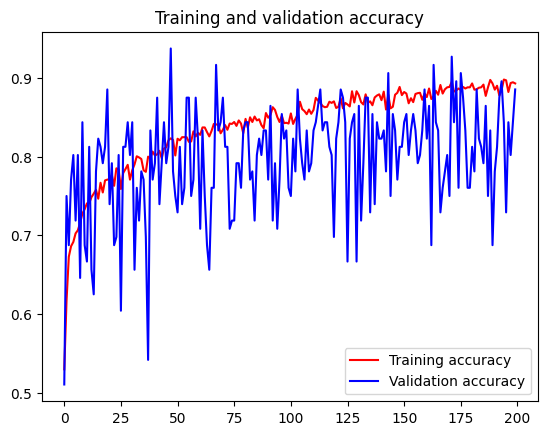

<Figure size 640x480 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt

# Plot the results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()


In [ ]:
#buat conffusion matrix

ValueError: ignored

In [ ]:
input = '/content/drive/MyDrive/image_data/test/fake/3.jpg'

img = tf.keras.utils.load_img(
    input, target_size=(32, 32)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely a {} image with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

1/1 [==============================] - 0s 94ms/step
This image most likely a fake image with a 73.11 percent confidence.


In [ ]:
!pip install tensorflowjs
model.save('keras.h5')
!mkdir model
!tensorflowjs_converter --input_format keras keras.h5 model/
!zip -r model.zip model
from google.colab import files
files.download('model.zip')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.1/85.1 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 189.9/189.9 kB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 68.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.9/40.9 kB 4.9 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 23.1
    Uninstalling packaging-23.1:
      Successfully uninstalled packaging-23.1
  Attempting uninstall: flax
    Found existing installation: flax 0.6.9
    Uninstalling flax-0.6.9:
      Successfully uninstalled flax-0.6.9
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
statsmodels 0.13.5 requires packaging>=21.3, but you have packaging 20.9 which is incompatible.
xar

2023-06-14 04:10:24.592831: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
  adding: model/ (stored 0%)
  adding: model/group1-shard1of2.bin (deflated 7%)
  adding: model/group1-shard2of2.bin (deflated 8%)
  adding: model/model.json (deflated 84%)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>